<a href="https://colab.research.google.com/github/BGBH/Country/blob/main/Country's_Publications_Collaborations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Preprocessing

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.cm as cm

# Load datasets
country_of_author = pd.read_excel('https://raw.githubusercontent.com/BGBH/Country/83bd53e770fc41efdb8d2db43401f0a91a1116a4/Countries1.xlsx', skiprows = 1) # Skiprow as row 1 empty

world = gpd.read_file('https://raw.githubusercontent.com/BGBH/Country/b599d7e057cfe81a1bec9baed3c6106de8a00f9c/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

country_of_colab = pd.read_excel('https://raw.githubusercontent.com/BGBH/Country/516b11e3e3b8f70eedeafedee07e71fecd97660a/Country%20collboration1.xlsx',skiprows = 1)

world = world[['NAME', 'geometry', 'SOV_A3']]
world['NAME'] = world['NAME'].str.upper()
country_of_colab['From'] = country_of_colab['From'].str.upper()
country_of_colab['To'] = country_of_colab['To'].str.upper()

# Print the country name that is not matching and modify the one that is not
print(country_of_author[~country_of_author['Country'].isin(world['NAME'])])

print(country_of_colab['From'][~country_of_colab['From'].isin(world['NAME'])].unique())
print(country_of_colab['To'][~country_of_colab['To'].isin(world['NAME'])].unique())

name_replacements = {
    'CZECH REPUBLIC': 'CZECHIA',
    'KOREA': 'SOUTH KOREA',
    'USA': 'UNITED STATES OF AMERICA',
    'U ARAB EMIRATES': 'UNITED ARAB EMIRATES'
}

country_of_author['Country'] = country_of_author['Country'].replace(name_replacements)

country_of_colab['From'] = country_of_colab['From'].replace(name_replacements)
country_of_colab['To'] = country_of_colab['To'].replace(name_replacements)
country_of_author.columns = ['NAME', 'Publications']

# Merge data
full_dataset = pd.merge(world, country_of_author, on='NAME', how='outer')

# Convert to GeoDataFrame
full_dataset = gpd.GeoDataFrame(full_dataset)

world['centroid'] = world.geometry.centroid
world['lon'] = world.centroid.x
world['lat'] = world.centroid.y

coords = pd.DataFrame({
    'lons_from': country_of_colab['From'].map(world.set_index('NAME')['lon']),
    'lats_from': country_of_colab['From'].map(world.set_index('NAME')['lat']),
    'lons_to': country_of_colab['To'].map(world.set_index('NAME')['lon']),
    'lats_to': country_of_colab['To'].map(world.set_index('NAME')['lat']),
    'counts': country_of_colab['Frequency']
}).dropna()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


           Country  Publications
1              USA           205
4            KOREA            31
15  CZECH REPUBLIC             7
['CZECH REPUBLIC' 'KOREA' 'USA']
['KOREA' 'USA' 'CZECH REPUBLIC' 'U ARAB EMIRATES']


<ipython-input-1-b4527d0cd7e2>:47: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.geometry.centroid
<ipython-input-1-b4527d0cd7e2>:48: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['lon'] = world.centroid.x
<ipython-input-1-b4527d0cd7e2>:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['lat'] = world.centroid.y


<ipython-input-2-d1a750118981>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontsize=25)
<ipython-input-2-d1a750118981>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=25)


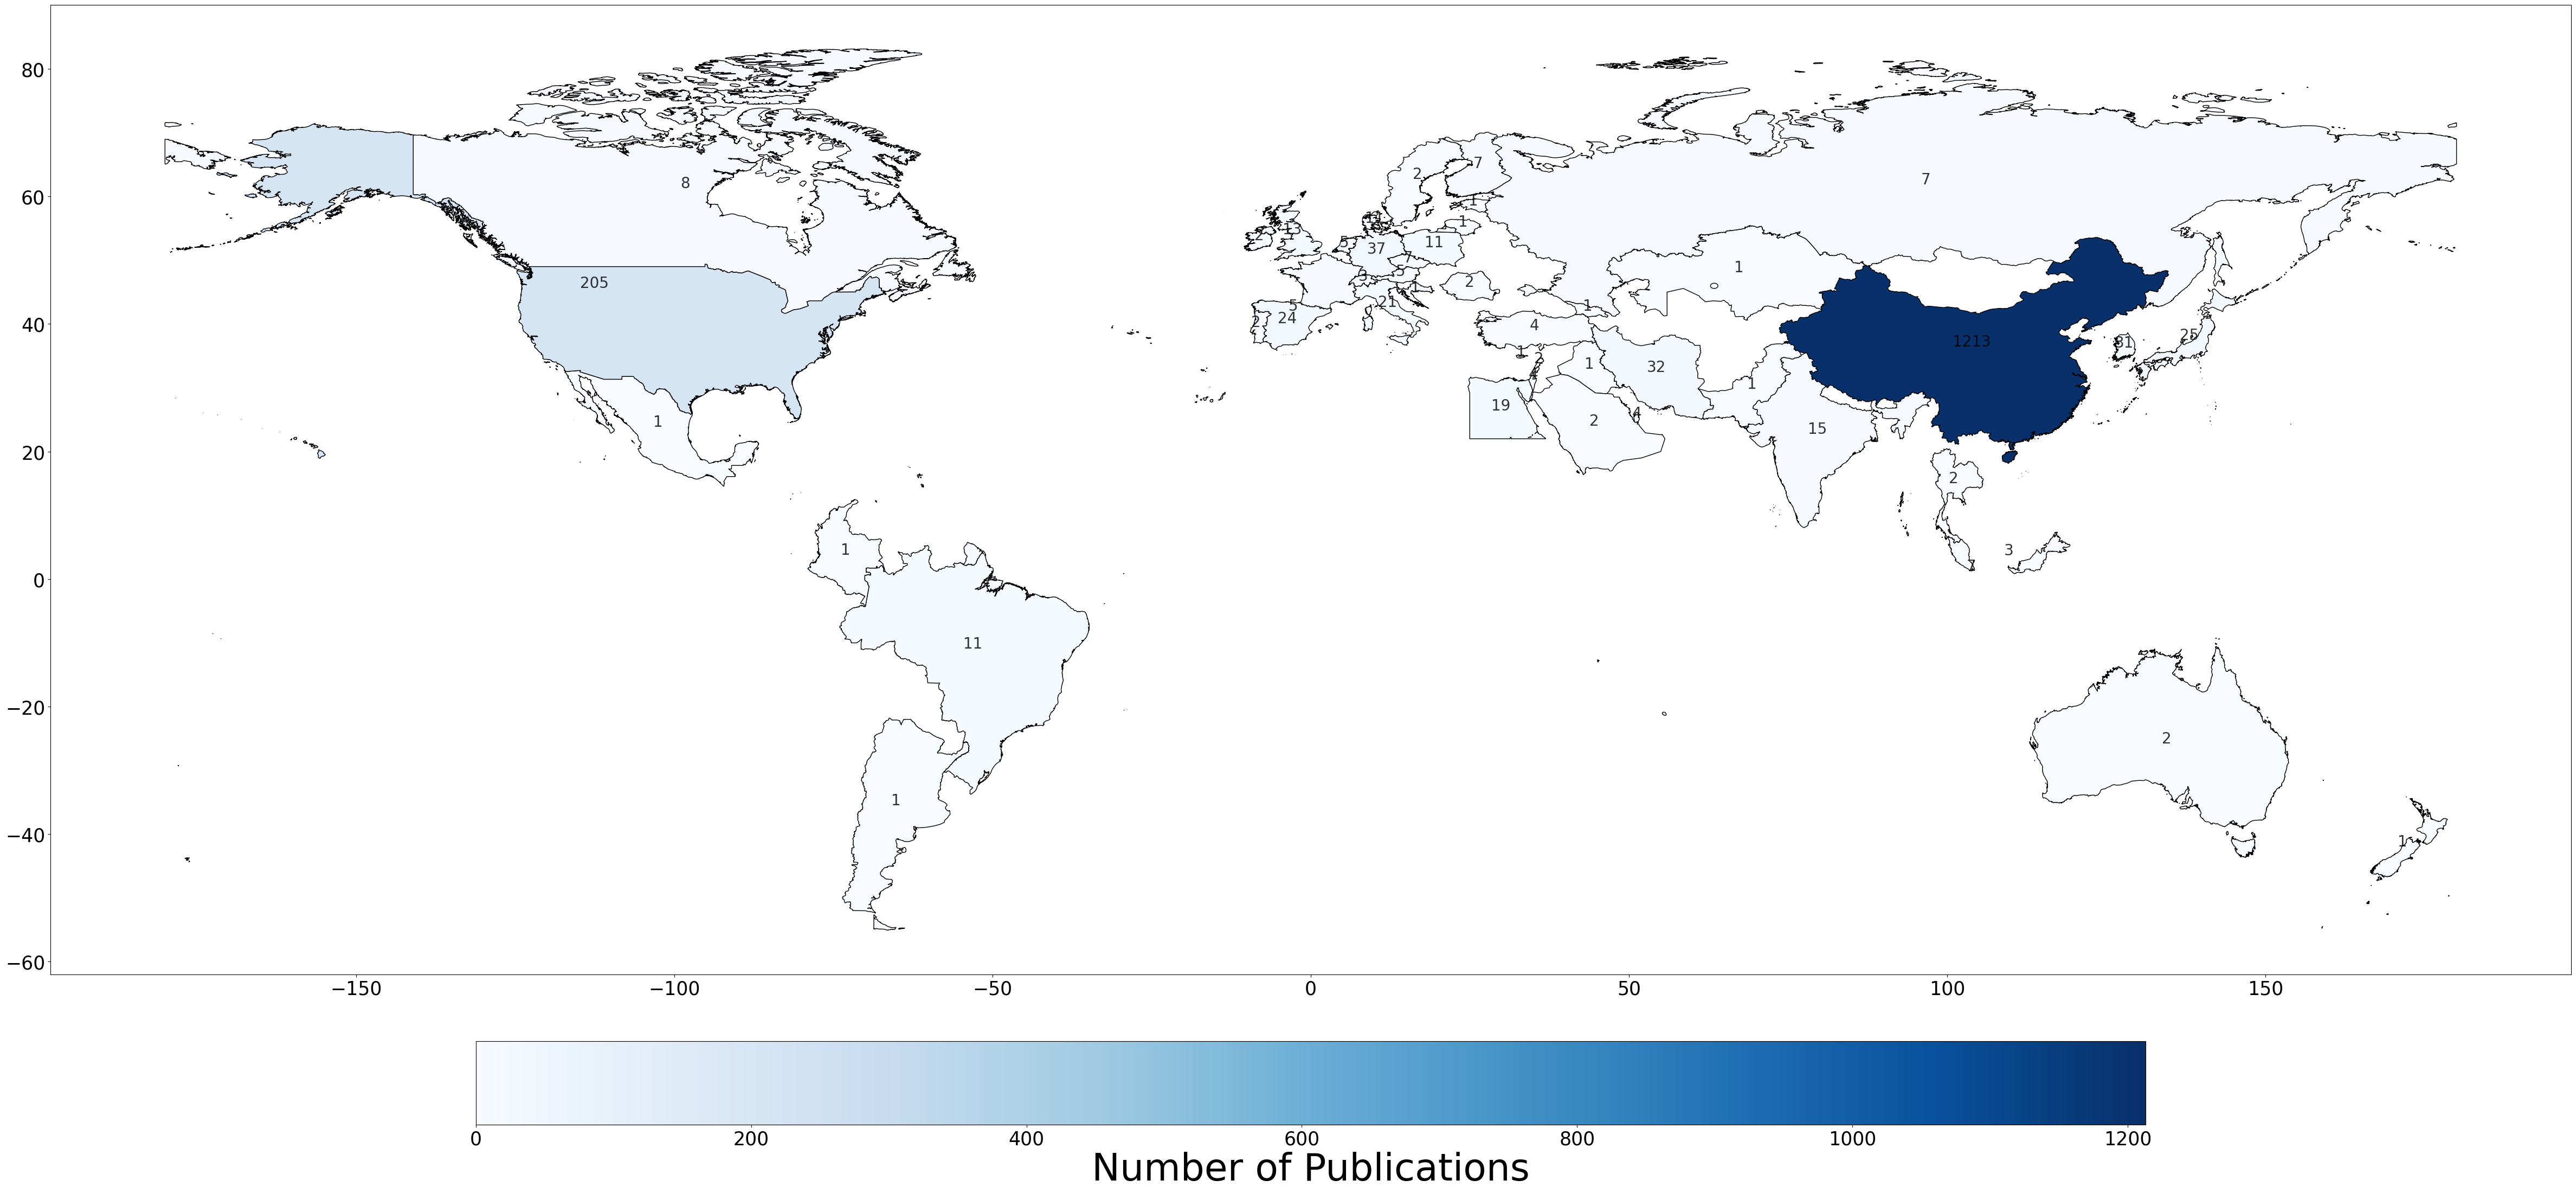

In [2]:
fig, ax = plt.subplots(figsize=(60, 40))

# Use updated colormap function
cmap = plt.colormaps.get_cmap('Blues')
norm = plt.Normalize(vmin=0, vmax=full_dataset['Publications'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Plot heatmap
full_dataset.plot(column='Publications', cmap=cmap, norm=norm, edgecolor='black', ax=ax)

# Add colorbar
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.04)
cbar.set_label('Number of Publications', fontsize=50)
cbar.ax.tick_params(labelsize=25)
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
ax.set_xticklabels(xticklabels, fontsize=25)
ax.set_yticklabels(yticklabels, fontsize=25)

# Add centroids with publication labels
for _, row in full_dataset.iterrows():
    if row['Publications'] > 0:
        centroid = row['geometry'].centroid
        ax.text(centroid.x, centroid.y, str(int(row['Publications'])),
                fontsize=20, ha='center', color='black', alpha=0.8)

plt.show()

<ipython-input-3-452c2cd325f3>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
<ipython-input-3-452c2cd325f3>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontsize=25)
<ipython-input-3-452c2cd325f3>:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=25)


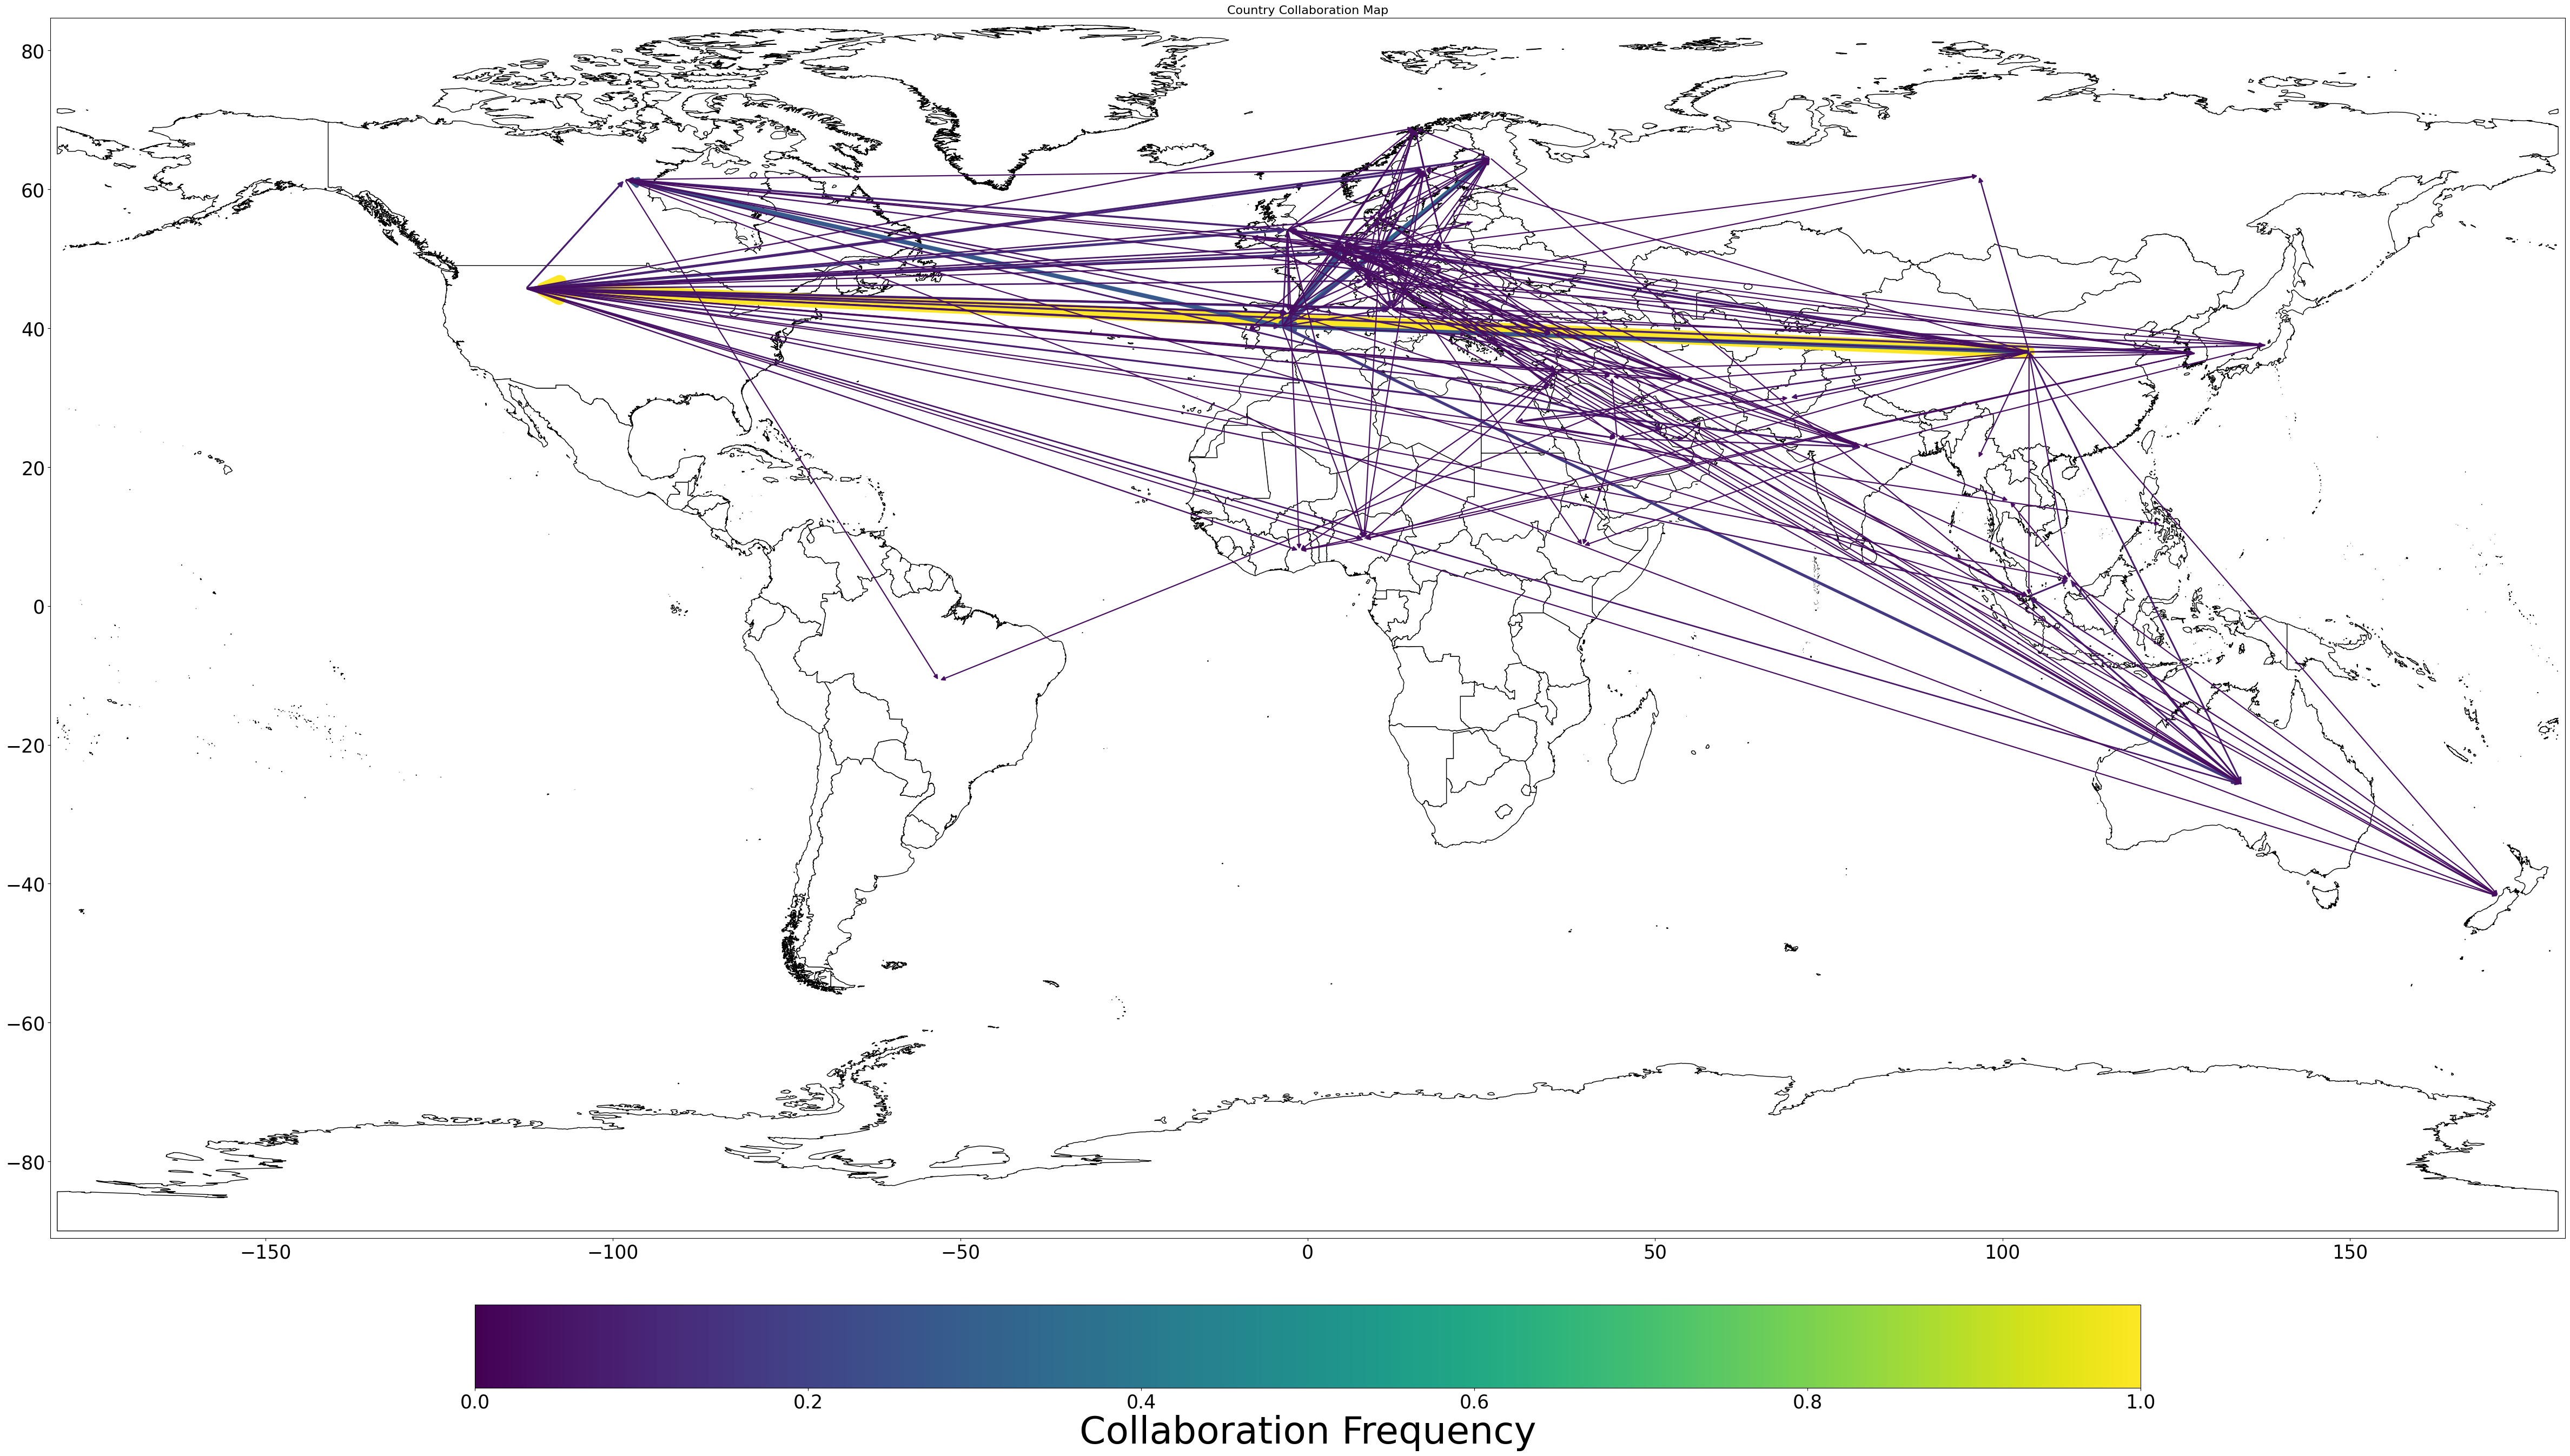

In [3]:
# Plot setup (portrait orientation)
fig, ax = plt.subplots(figsize=(60, 40))

# Set the background color to white
ax.set_facecolor('white')

# Plot the world map with white countries and black borders
world.plot(ax=ax, color='white', edgecolor='black')

# Set aspect ratio
ax.set_aspect('equal')

# Use the 'viridis' colormap directly, without normalizing
cmap = cm.get_cmap('viridis')

#~~~~~~
coords.sort_values(by='counts', ascending=False, inplace=True)
coords.reset_index(drop=True, inplace=True)

# Plot collaboration arrows
for _, row in coords.iterrows():

    ax.add_patch(FancyArrowPatch(
        (row['lons_from'], row['lats_from']),
        (row['lons_to'], row['lats_to']),
        color=cmap(row['counts'] / max(coords['counts'])),  # Scale color based on counts directly
        arrowstyle='-|>',
        mutation_scale=10 + row['counts'] * 0.5,  # Adjust this scaling factor
        linewidth=1 + row['counts'] * 0.2  # Adjust thickness
    ))

# Get the total bounds of the world dataset
xmin, ymin, xmax, ymax = world.total_bounds

# Add padding to the boundaries for better visibility
padding = 1.0  # Adjust this value as needed (degrees of latitude/longitude)
ax.set_xlim(xmin - padding, xmax + padding)  # Set longitude limits with padding
ax.set_ylim(ymin - padding, ymax + padding)  # Set latitude limits with padding

xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
ax.set_xticklabels(xticklabels, fontsize=25)
ax.set_yticklabels(yticklabels, fontsize=25)

# Add colorbar for frequency
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.04)
cbar.set_label('Collaboration Frequency',fontsize=50)

cbar.ax.tick_params(labelsize=25)
# Add padding to the boundaries for better visibility
padding = 1.0  # Adjust this value as needed (degrees of latitude/longitude)
ax.set_xlim(xmin - padding, xmax + padding)  # Set longitude limits with padding
ax.set_ylim(ymin - padding, ymax + padding)  # Set latitude limits with padding



# Display the title
plt.title('Country Collaboration Map', fontsize=16)

# Show the plot
plt.show()

<ipython-input-4-461a26162256>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
<ipython-input-4-461a26162256>:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontsize=25)
<ipython-input-4-461a26162256>:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels, fontsize=25)


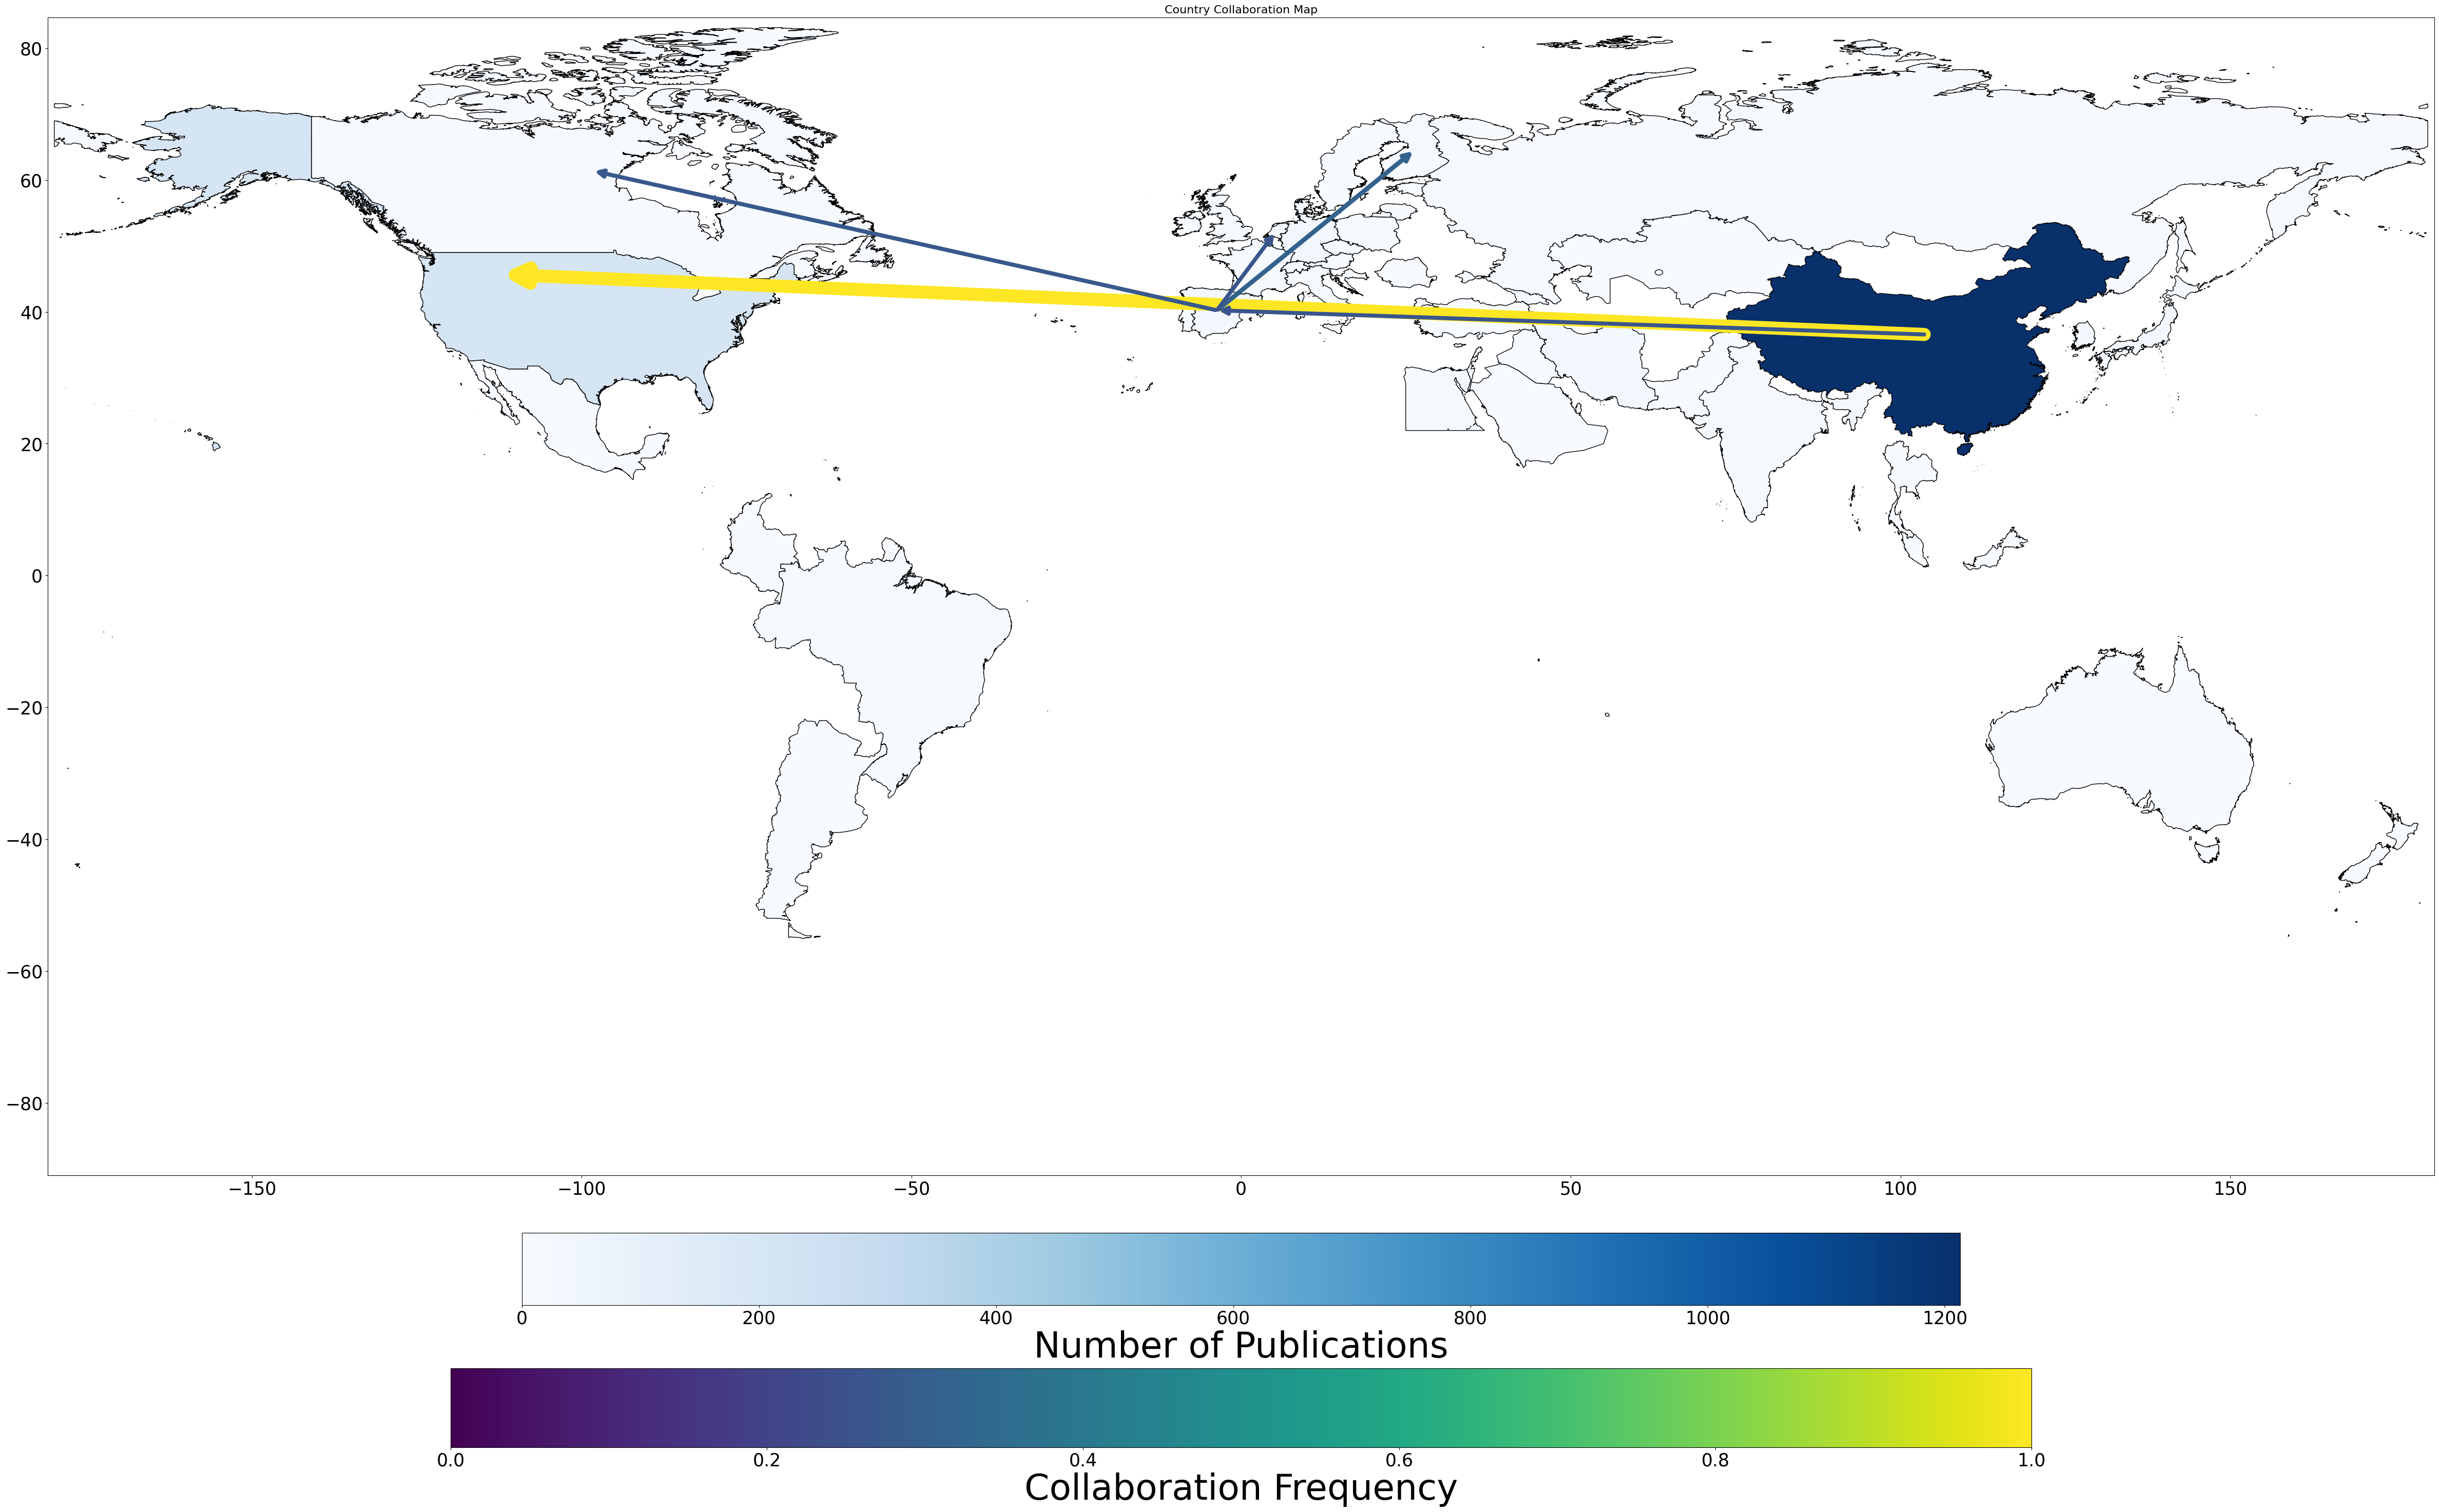

In [4]:
# Plot setup (portrait orientation)
fig, ax = plt.subplots(figsize=(60, 40))

# Set the background color to white
ax.set_facecolor('white')

# Use updated colormap function
cmap = plt.colormaps.get_cmap('Blues')
norm = plt.Normalize(vmin=0, vmax=full_dataset['Publications'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Plot heatmap
full_dataset.plot(column='Publications', cmap=cmap, norm=norm, edgecolor='black', ax=ax)

# Set aspect ratio
ax.set_aspect('equal')

# Use the 'viridis' colormap directly, without normalizing
cmap = cm.get_cmap('viridis')

#~~~~~~
coords.sort_values(by='counts', ascending=False, inplace=True)
coords.reset_index(drop=True, inplace=True)

# Plot collaboration arrows
for _, row in coords.iterrows():
  if _<5:
    ax.add_patch(FancyArrowPatch(
        (row['lons_from'], row['lats_from']),
        (row['lons_to'], row['lats_to']),
        color=cmap(row['counts'] / max(coords['counts'])),  # Scale color based on counts directly
        arrowstyle='-|>',
        mutation_scale=10 + row['counts'] * 0.5,  # Adjust this scaling factor
        linewidth=1 + row['counts'] * 0.2  # Adjust thickness
    ))

# Get the total bounds of the world dataset
xmin, ymin, xmax, ymax = world.total_bounds

# Add padding to the boundaries for better visibility
padding = 1.0  # Adjust this value as needed (degrees of latitude/longitude)
ax.set_xlim(xmin - padding, xmax + padding)  # Set longitude limits with padding
ax.set_ylim(ymin - padding, ymax + padding)  # Set latitude limits with padding

# Add colorbar for frequency
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.04)
cbar.set_label('Collaboration Frequency', fontsize=50)
cbar.ax.tick_params(labelsize=25)

# Add padding to the boundaries for better visibility
padding = 1.0  # Adjust this value as needed (degrees of latitude/longitude)
ax.set_xlim(xmin - padding, xmax + padding)  # Set longitude limits with padding
ax.set_ylim(ymin - padding, ymax + padding)  # Set latitude limits with padding

xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()
ax.set_xticklabels(xticklabels, fontsize=25)
ax.set_yticklabels(yticklabels, fontsize=25)

cmap = plt.colormaps.get_cmap('Blues')
norm = plt.Normalize(vmin=0, vmax=full_dataset['Publications'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.04)
cbar.set_label('Number of Publications', fontsize=50)
cbar.ax.tick_params(labelsize=25)

# Display the title
plt.title('Country Collaboration Map', fontsize=16)

# Show the plot
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Example data
data = [
    {"From": "AUSTRALIA", "To": "BELGIUM", "Frequency": 3},
    {"From": "AUSTRALIA", "To": "MALAYSIA", "Frequency": 6},
    {"From": "AUSTRALIA", "To": "SINGAPORE", "Frequency": 7},
    {"From": "CANADA", "To": "FRANCE", "Frequency": 4},
    {"From": "CANADA", "To": "QATAR", "Frequency": 6},
    {"From": "CHINA", "To": "USA", "Frequency": 87},
    {"From": "CHINA", "To": "SPAIN", "Frequency": 23},
    {"From": "USA", "To": "GERMANY", "Frequency": 12},
    {"From": "USA", "To": "UNITED KINGDOM", "Frequency": 12},
]

# Create a DataFrame
df = pd.DataFrame(data)

# Approximate locations of countries (latitude and longitude coordinates)
country_coords = {
    "AUSTRALIA": (-25.27, 133.77),
    "BELGIUM": (50.85, 4.35),
    "MALAYSIA": (4.21, 101.98),
    "SINGAPORE": (1.35, 103.82),
    "CANADA": (56.13, -106.34),
    "FRANCE": (46.60, 2.34),
    "QATAR": (25.27, 51.52),
    "CHINA": (35.86, 104.19),
    "USA": (37.09, -95.71),
    "SPAIN": (40.46, -3.75),
    "GERMANY": (51.17, 10.45),
    "UNITED KINGDOM": (55.37, -3.44),
}

# Add coordinates to the DataFrame
df["From_Lat"] = df["From"].map(lambda x: country_coords[x][0])
df["From_Lon"] = df["From"].map(lambda x: country_coords[x][1])
df["To_Lat"] = df["To"].map(lambda x: country_coords[x][0])
df["To_Lon"] = df["To"].map(lambda x: country_coords[x][1])

# Create the map
fig = go.Figure()

# Create a dictionary to store hover info for each country
country_hoverinfo = {}

# Add lines representing the flows between countries
for _, row in df.iterrows():
    # Outgoing flow
    if row["From"] not in country_hoverinfo:
        country_hoverinfo[row["From"]] = []
    country_hoverinfo[row["From"]].append(f"→ {row['To']}: {row['Frequency']} collaborations")

    # Incoming flow
    if row["To"] not in country_hoverinfo:
        country_hoverinfo[row["To"]] = []
    country_hoverinfo[row["To"]].append(f"← {row['From']}: {row['Frequency']} collaborations")

    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[row["From_Lon"], row["To_Lon"]],
        lat=[row["From_Lat"], row["To_Lat"]],
        mode='lines',
        line=dict(width=row["Frequency"] / 2, color='blue'),
        opacity=0.6,
        text=f'{row["From"]} → {row["To"]}: {row["Frequency"]} collaborations',
        hoverinfo='text',
    ))

# Add markers for the countries
for country, coords in country_coords.items():
    # Create a hover template for each country
    hover_text = "<br>".join(country_hoverinfo.get(country, []))
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[coords[1]],
        lat=[coords[0]],
        mode='markers',
        marker=dict(size=10, color='red'),
        text=country,
        hovertemplate=f"<b>{country}</b><br>{hover_text}<extra></extra>",  # Add the dropdown-like list of collaborations
    ))

# Map layout settings
fig.update_layout(
    title_text='International Collaborations Between Countries',
    showlegend=False,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',
    ),
)

fig.show()


# For more information:
https://www.youtube.com/watch?v=Rvf5mmyW7a0